In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab
import quandl
quandl.ApiConfig.api_key = "32peB6ExRM7Lihbpsdsd"
import seaborn as sns
sns.set()
%matplotlib inline
#textblob to apply sentiment analysis 
from textblob import TextBlob

In [10]:
#read the csv file containing tweets about 'Tesla'
parent_dir = '../using_twint/'
filename = 'tesla_tweets_3.csv'
tweets = pd.read_csv(parent_dir+ filename, low_memory=False)
tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,link,retweet,quote_url,video,profile_image_url,polarity,subjectivity,weekofyear,weekday,year
0,682701956268343296,682701956268343296,1451603805000,2015-12-31,18:16:45,EDT,18131006,bgr,BGR.com,NaN,...,https://twitter.com/BGR/status/682701956268343296,NaN,NaN,0,https://pbs.twimg.com/profile_images/900756472...,-0.166667,0.166667,53,3,2015
1,682697919368196097,682697919368196097,1451602842000,2015-12-31,18:00:42,EDT,25053299,fortunemagazine,FORTUNE,NaN,...,https://twitter.com/FortuneMagazine/status/682...,NaN,NaN,0,https://pbs.twimg.com/profile_images/875382047...,0.500000,0.900000,53,3,2015
2,682696607691755522,682696607691755522,1451602529000,2015-12-31,17:55:29,EDT,15342414,ricardoblanco,Mr. ¯\_(ツ)_/¯hite,NaN,...,https://twitter.com/RicardoBlanco/status/68269...,NaN,NaN,0,https://pbs.twimg.com/profile_images/113225875...,0.000000,1.000000,53,3,2015
3,682695473803612160,682695053899345920,1451602259000,2015-12-31,17:50:59,EDT,15227849,semil,Semil,NaN,...,https://twitter.com/semil/status/6826954738036...,NaN,NaN,0,https://pbs.twimg.com/profile_images/997692272...,0.360000,0.770000,53,3,2015
4,682688694910894080,682688694910894080,1451600643000,2015-12-31,17:24:03,EDT,38360819,alzeidenfeld,Al Smizzle,NaN,...,https://twitter.com/AlZeidenfeld/status/682688...,NaN,NaN,0,https://pbs.twimg.com/profile_images/932784159...,0.136364,0.477273,53,3,2015


In [3]:
#get a particular tweet text
some_tweet = tweets.iloc[random.randint(1, 100)]['tweet']
print(some_tweet)
#get the 'sentiment' of a particular tweet 
analysis = TextBlob(some_tweet)
print(analysis.sentiment)

Hey @SteveSasman, we're gunna have to get you on @periscope ... My good friend @ChocolateJohnny doesn't know what a #Tesla is!
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)


### setiment analysis with TextBlob

In [4]:
tweets['polarity'] = a = tweets['tweet'].apply(lambda x:TextBlob(x).polarity)
tweets['subjectivity'] = b = tweets['tweet'].apply(lambda x:TextBlob(x).subjectivity)

### Append extra features from 'date' for the ease of time series aggregation

In [6]:
#convert the 'date' column to datetime type
tweets.date = pd.to_datetime(tweets.date)
#append weekofyear, weekday(0=Mon,... 6=Sun), year based on date, 
tweets['weekofyear'] = tweets['date'].dt.weekofyear
tweets['weekday'] = tweets['date'].dt.weekday
tweets['year'] = tweets['date'].dt.year

In [12]:
tweets.to_csv(parent_dir + filename.strip('.csv') +'_appended.csv')

In [13]:
columns = ['polarity', 'weekofyear']
weekly_pol = tweets.loc[tweets['year'] == 2015, columns].groupby('weekofyear').mean()
weekly_pol = weekly_pol[:-1]

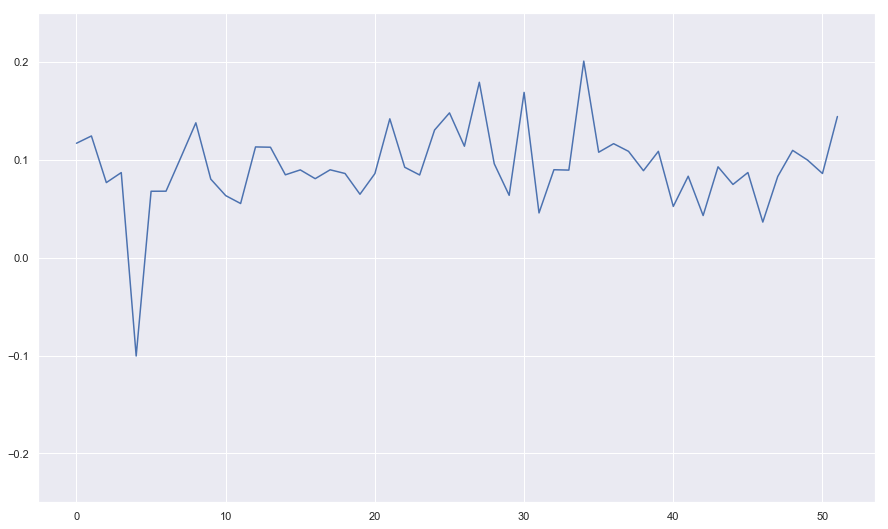

In [14]:
#plot the weekly average sentiment for 2015
pylab.rcParams['figure.figsize'] = (15, 9)
plt.ylim(-0.25, 0.25)
plt.plot(np.arange(0,52), weekly_pol['polarity'])

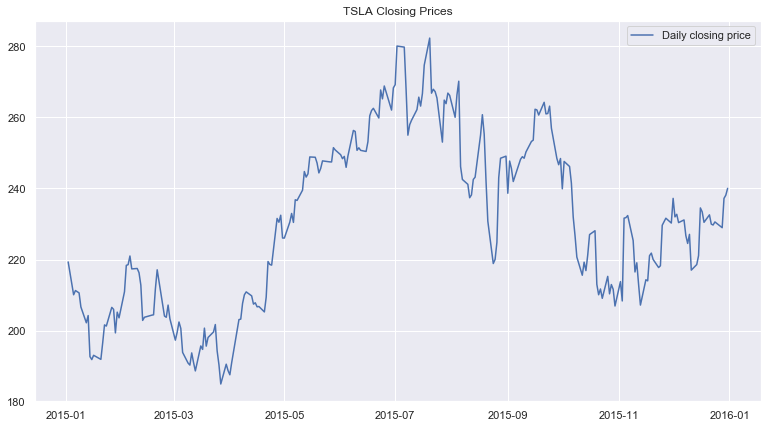

In [15]:
#get the weekly percent difference in the stock prices 
start = datetime.datetime(2015,1,1) # Beginning of period 
end = datetime.datetime(2016,1,1) # End of period 
stock = "TSLA" # some stock label we are interested in
data = quandl.get("WIKI/" + stock, start_date=start, end_date=end)
pylab.rcParams['figure.figsize'] = (13, 7)
plt.title(stock + " Closing Prices")
plt.plot(data["Close"],label="Daily closing price") # plot daily closing prices 
plt.legend()
plt.show()

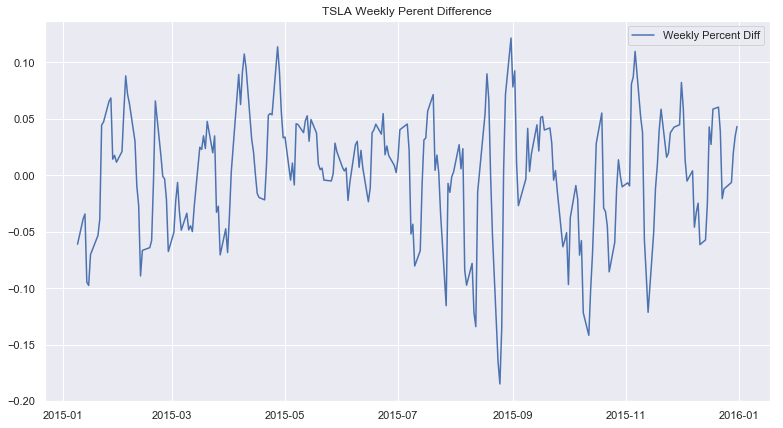

In [16]:
#get the weekly percent difference in the stock price
data["WeekPercDiff"] = data["Close"].diff(periods=5) / data["Close"]
plt.title(stock + " Weekly Perent Difference")
plt.plot(data["WeekPercDiff"],label="Weekly Percent Diff") # plot daily closing prices 
plt.legend()
plt.show()

In [17]:
data['weekofyear'] = data.index.weekofyear
data['weekday'] = data.index.weekday
data['year'] = data.index.year

In [18]:
#get price percent differences on fridays (weekday == 4)
wed_stocks = data.loc[data['weekday'] == 2]
wed_stocks.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,WeekPercDiff,weekofyear,weekday,year
Date,,,,,,,,,,,,,,,,
2015-01-07,213.35,214.780,209.78,210.95,2968390.0,0.0,1.0,213.35,214.780,209.78,210.95,2968390.0,NaN,2,2,2015
2015-01-14,185.83,195.200,185.00,192.69,11551855.0,0.0,1.0,185.83,195.200,185.00,192.69,11551855.0,-0.094764,3,2,2015
2015-01-21,189.55,198.680,189.51,196.57,4153043.0,0.0,1.0,189.55,198.680,189.51,196.57,4153043.0,-0.039070,4,2,2015
2015-01-28,206.11,206.368,198.42,199.37,3149606.0,0.0,1.0,206.11,206.368,198.42,199.37,3149606.0,0.014044,5,2,2015
2015-02-04,218.29,221.479,216.80,218.55,3305377.0,0.0,1.0,218.29,221.479,216.80,218.55,3305377.0,0.087760,6,2,2015


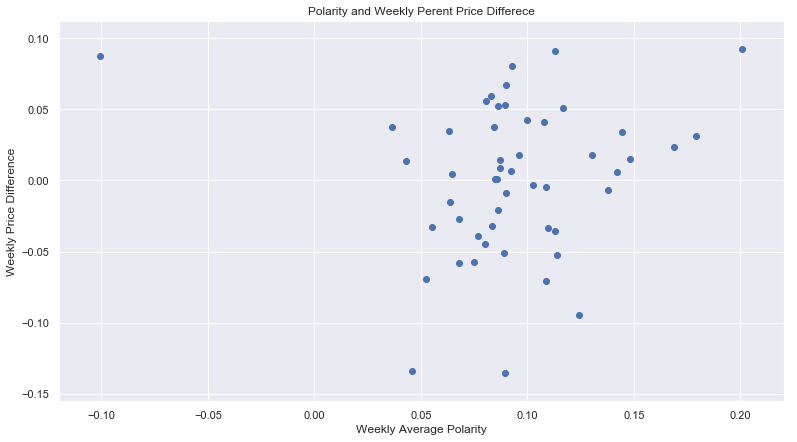

In [28]:
#weekly_pol['polarity'].shape
#wed_stocks["WeekPercDiff"].shape
plt.title("Polarity and Weekly Perent Price Differece")
plt.xlabel('Weekly Average Polarity')
plt.ylabel('Weekly Price Difference')
plt.scatter(weekly_pol['polarity'], wed_stocks["WeekPercDiff"])
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


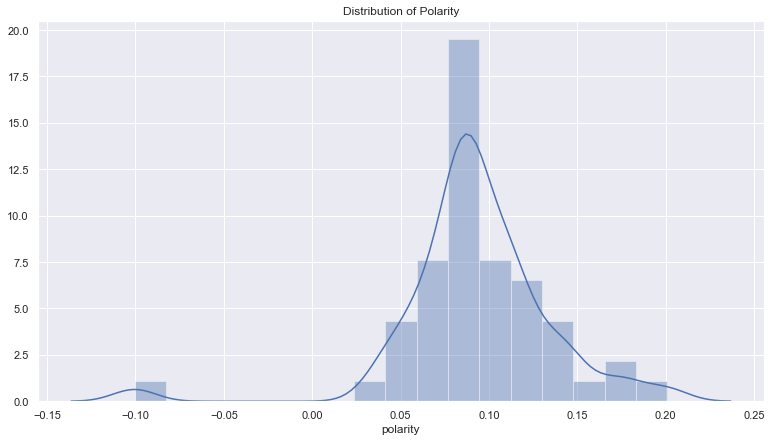

In [29]:
plt.title("Distribution of Polarity")
plt.xlabel("Polarity")
#plt.hist(weekly_pol['polarity'])
sns.distplot(weekly_pol['polarity'])
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 2.,  1.,  2.,  5.,  6.,  8., 10.,  7.,  6.,  4.]),
 array([-0.13525173, -0.11250132, -0.08975091, -0.06700049, -0.04425008,
        -0.02149966,  0.00125075,  0.02400117,  0.04675158,  0.069502  ,
         0.09225241]),
 <a list of 10 Patch objects>)

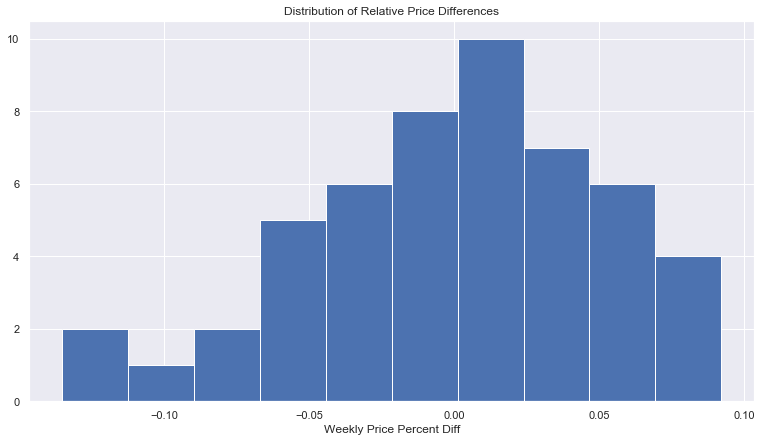

In [30]:
plt.title("Distribution of Relative Price Differences")
plt.xlabel("Weekly Price Percent Diff")
#sns.distplot(wed_stocks["WeekPercDiff"])
plt.hist(wed_stocks["WeekPercDiff"])